# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 10. Finding stationary timeseries for further analysis

In [20]:
# Importing the necessary python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [21]:
# Load in the previosuly prepared datasets
df_1 = pd.read_csv("prepared_data_sample_1.csv", parse_dates=["date"]) # First wave sample
df_1_1 = pd.read_csv("prepared_data_sample_1.csv", parse_dates=["date"]) # First wave sample
df_2 = pd.read_csv("prepared_data_sample_2.csv", parse_dates=["date"]) # Second wave Sample
df_3 = pd.read_csv("prepared_data_sample_full.csv", parse_dates=["date"]) # Full sample timeframe

# Droping unnecessary columns for now
df_1.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

df_1_1.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

df_2.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

df_3.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

In [22]:
# Creating a set of different transformations for the first sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_1["close_pct"] = ( df_1["hdax_close"] - df_1["hdax_close"].shift(1) ) / df_1["hdax_close"].shift(1)
df_1["close_log"] = ( np.log(df_1["hdax_close"]) - np.log(df_1["hdax_close"].shift(1)))
df_1["close_diff"] = ( df_1["hdax_close"] - df_1["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_1["total_pct"] = ( df_1["total_cases"] - df_1["total_cases"].shift(1) ) / df_1["total_cases"].shift(1)
df_1["total_log"] = ( np.log(df_1["total_cases"]) - np.log(df_1["total_cases"].shift(1)))
df_1["total_diff"] = ( df_1["total_cases"] - df_1["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_1["new_pct"] = ( df_1["new_cases"] - df_1["new_cases"].shift(1) ) / df_1["new_cases"].shift(1)
df_1["new_log"] = ( np.log(df_1["new_cases"]) - np.log(df_1["new_cases"].shift(1)))
df_1["new_diff"] = ( df_1["new_cases"] - df_1["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_1["stringency_pct"] = ( df_1["stringency_index"] - df_1["stringency_index"].shift(1) ) / df_1["stringency_index"].shift(1)
df_1["stringency_log"] = ( np.log(df_1["stringency_index"]) - np.log(df_1["stringency_index"].shift(1)))
df_1["stringency_diff"] = ( df_1["stringency_index"] - df_1["stringency_index"].shift(1) )
df_1["stringency_2_diff"] = ( df_1["stringency_diff"] - df_1["stringency_diff"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_1["containment_pct"] = ( df_1["containment_index"] - df_1["containment_index"].shift(1) ) / df_1["containment_index"].shift(1)
df_1["containment_log"] = ( np.log(df_1["containment_index"]) - np.log(df_1["containment_index"].shift(1)))
df_1["containment_diff"] = ( df_1["containment_index"] - df_1["containment_index"].shift(1) )
df_1["containment_2_diff"] = ( df_1["containment_diff"] - df_1["containment_diff"].shift(1) )

In [23]:
# Creating a set of different transformations for the first_1 sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_1_1["close_pct"] = ( df_1_1["hdax_close"] - df_1_1["hdax_close"].shift(1) ) / df_1_1["hdax_close"].shift(1)
df_1_1["close_log"] = ( np.log(df_1_1["hdax_close"]) - np.log(df_1_1["hdax_close"].shift(1)))
df_1_1["close_diff"] = ( df_1_1["hdax_close"] - df_1_1["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_1_1["total_pct"] = ( df_1_1["total_cases"] - df_1_1["total_cases"].shift(1) ) / df_1_1["total_cases"].shift(1)
df_1_1["total_log"] = ( np.log(df_1_1["total_cases"]) - np.log(df_1_1["total_cases"].shift(1)))
df_1_1["total_diff"] = ( df_1_1["total_cases"] - df_1_1["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_1_1["new_pct"] = ( df_1_1["new_cases"] - df_1_1["new_cases"].shift(1) ) / df_1_1["new_cases"].shift(1)
df_1_1["new_log"] = ( np.log(df_1_1["new_cases"]) - np.log(df_1_1["new_cases"].shift(1)))
df_1_1["new_diff"] = ( df_1_1["new_cases"] - df_1_1["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_1_1["stringency_pct"] = ( df_1_1["stringency_index"] - df_1_1["stringency_index"].shift(1) ) / df_1_1["stringency_index"].shift(1)
df_1_1["stringency_log"] = ( np.log(df_1_1["stringency_index"]) - np.log(df_1_1["stringency_index"].shift(1)))
df_1_1["stringency_diff"] = ( df_1_1["stringency_index"] - df_1_1["stringency_index"].shift(1) )
df_1_1["stringency_2_diff"] = ( df_1_1["stringency_diff"] - df_1_1["stringency_diff"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_1_1["containment_pct"] = ( df_1_1["containment_index"] - df_1_1["containment_index"].shift(1) ) / df_1_1["containment_index"].shift(1)
df_1_1["containment_log"] = ( np.log(df_1_1["containment_index"]) - np.log(df_1_1["containment_index"].shift(1)))
df_1_1["containment_diff"] = ( df_1_1["containment_index"] - df_1_1["containment_index"].shift(1) )
df_1_1["containment_2_diff"] = ( df_1_1["containment_diff"] - df_1_1["containment_diff"].shift(1) )

In [24]:
# Creating a set of different transformations for the second sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_2["close_pct"] = ( df_2["hdax_close"] - df_2["hdax_close"].shift(1) ) / df_2["hdax_close"].shift(1)
df_2["close_log"] = ( np.log(df_2["hdax_close"]) - np.log(df_2["hdax_close"].shift(1)))
df_2["close_diff"] = ( df_2["hdax_close"] - df_2["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_2["total_pct"] = ( df_2["total_cases"] - df_2["total_cases"].shift(1) ) / df_2["total_cases"].shift(1)
df_2["total_log"] = ( np.log(df_2["total_cases"]) - np.log(df_2["total_cases"].shift(1)))
df_2["total_diff"] = ( df_2["total_cases"] - df_2["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_2["new_pct"] = ( df_2["new_cases"] - df_2["new_cases"].shift(1) ) / df_2["new_cases"].shift(1)
df_2["new_log"] = ( np.log(df_2["new_cases"]) - np.log(df_2["new_cases"].shift(1)))
df_2["new_diff"] = ( df_2["new_cases"] - df_2["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_2["stringency_pct"] = ( df_2["stringency_index"] - df_2["stringency_index"].shift(1) ) / df_2["stringency_index"].shift(1)
df_2["stringency_log"] = ( np.log(df_2["stringency_index"]) - np.log(df_2["stringency_index"].shift(1)))
df_2["stringency_diff"] = ( df_2["stringency_index"] - df_2["stringency_index"].shift(1) )
df_2["stringency_2_diff"] = ( df_2["stringency_diff"] - df_2["stringency_diff"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_2["containment_pct"] = ( df_2["containment_index"] - df_2["containment_index"].shift(1) ) / df_2["containment_index"].shift(1)
df_2["containment_log"] = ( np.log(df_2["containment_index"]) - np.log(df_2["containment_index"].shift(1)))
df_2["containment_diff"] = ( df_2["containment_index"] - df_2["containment_index"].shift(1) )
df_2["containment_2_diff"] = ( df_2["containment_diff"] - df_2["containment_diff"].shift(1) )

In [25]:
# Creating a set of different transformations for the full sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_3["close_pct"] = ( df_3["hdax_close"] - df_3["hdax_close"].shift(1) ) / df_3["hdax_close"].shift(1)
df_3["close_log"] = ( np.log(df_3["hdax_close"]) - np.log(df_3["hdax_close"].shift(1)))
df_3["close_diff"] = ( df_3["hdax_close"] - df_3["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_3["total_pct"] = ( df_3["total_cases"] - df_3["total_cases"].shift(1) ) / df_3["total_cases"].shift(1)
df_3["total_log"] = ( np.log(df_3["total_cases"]) - np.log(df_3["total_cases"].shift(1)))
df_3["total_diff"] = ( df_3["total_cases"] - df_3["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_3["new_pct"] = ( df_3["new_cases"] - df_3["new_cases"].shift(1) ) / df_3["new_cases"].shift(1)
df_3["new_log"] = ( np.log(df_3["new_cases"]) - np.log(df_3["new_cases"].shift(1)))
df_3["new_diff"] = ( df_3["new_cases"] - df_3["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_3["stringency_pct"] = ( df_3["stringency_index"] - df_3["stringency_index"].shift(1) ) / df_3["stringency_index"].shift(1)
df_3["stringency_log"] = ( np.log(df_3["stringency_index"]) - np.log(df_3["stringency_index"].shift(1)))
df_3["stringency_diff"] = ( df_3["stringency_index"] - df_3["stringency_index"].shift(1) )
df_3["stringency_2_diff"] = ( df_3["stringency_diff"] - df_3["stringency_diff"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_3["containment_pct"] = ( df_3["containment_index"] - df_3["containment_index"].shift(1) ) / df_3["containment_index"].shift(1)
df_3["containment_log"] = ( np.log(df_3["containment_index"]) - np.log(df_3["containment_index"].shift(1)))
df_3["containment_diff"] = ( df_3["containment_index"] - df_3["containment_index"].shift(1) )
df_3["containment_2_diff"] = ( df_3["containment_diff"] - df_3["containment_diff"].shift(1) )

In [26]:
# Reordering the columns

df_1 = df_1[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff', "stringency_2_diff",
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff', "containment_2_diff"
             ]].copy(deep=True)

df_1_1 = df_1_1[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff', "stringency_2_diff",
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff', "containment_2_diff"
             ]].copy(deep=True)

df_2 = df_2[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff', "stringency_2_diff",
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff', "containment_2_diff"
             ]].copy(deep=True)

df_3 = df_3[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff', "stringency_2_diff",
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff', "containment_2_diff"
             ]].copy(deep=True)

In [27]:
# Creating a function that takes a timeseries as an input, performs a KPSS test for stationarity on the data
# and returns the test-statistic, the p-value the chosen the truncation lag parameter and the critical values
# H0: The data is stationary around a constant mean
# H1: The series is not stationary

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    return kpsstest

# Creating a function that determines whether an input p-value indicates stationarity or non-stationarity
# Default statistic significance level is set to 5%
def kpss_stationarity(p_value, level=0.05):
    if p_value <= level:
        return "Non-Stationary"
    else:
        return "Stationary"
    
    
# -----------------------------------------------------------------------------------------------------------
    
    
# Creating a function that takes a timeseries as an input, chooses a lag-length based on the AIC,
# performs an ADF test for stationarity on the data and returns the test-statistic,
# MacKinnon’s approximate p-value, the chosen lag length, the number of observations and the critical values
# H0: The series has a unit root (series is not stationary)
# H1: The series has no unit root (series is stationary)    
    
from statsmodels.tsa.stattools import adfuller   

def adf_test(timeseries):
    adftest = adfuller(timeseries, autolag="AIC", regression='c')
    return adftest

# Creating a function that determines whether an input p-value indicates stationarity or non-stationarity
# Default statistic significance level is set to 5%
def adf_stationarity(p_value, level=0.05):
    if p_value <= level:
        return "Stationary"
    else:
        return "Non-Stationary"

In [28]:
# Saving the column names to a list for subsequent functions
columns = list(df_1.columns)
columns.remove("date")

In [29]:
# Creating a table for all samples with the results of the two tests for each timeseries

# Find transformations that lead to stationarity in the first wave sample
results_sample_1 = pd.DataFrame({"Timeseries": columns,
                                 "adf_p_value": [adf_test(df_1[column].dropna())[1] for column in columns],
                                 "kpss_p_value": [kpss_test(df_1[column].dropna())[1] for column in columns],})
results_sample_1["adf_stationarity"] = results_sample_1["adf_p_value"].apply(adf_stationarity)
results_sample_1["kpss_stationarity"] = results_sample_1["kpss_p_value"].apply(kpss_stationarity)

# Find transformations that lead to stationarity in the first_1 wave sample
results_sample_1_1 = pd.DataFrame({"Timeseries": columns,
                                 "adf_p_value": [adf_test(df_1_1[column].dropna())[1] for column in columns],
                                 "kpss_p_value": [kpss_test(df_1_1[column].dropna())[1] for column in columns],})
results_sample_1_1["adf_stationarity"] = results_sample_1_1["adf_p_value"].apply(adf_stationarity)
results_sample_1_1["kpss_stationarity"] = results_sample_1_1["kpss_p_value"].apply(kpss_stationarity)

# Find transformations that lead to stationarity in the second wave sample
results_sample_2 = pd.DataFrame({"Timeseries": columns,
                                 "adf_p_value": [adf_test(df_2[column].dropna())[1] for column in columns],
                                 "kpss_p_value": [kpss_test(df_2[column].dropna())[1] for column in columns],})
results_sample_2["adf_stationarity"] = results_sample_2["adf_p_value"].apply(adf_stationarity)
results_sample_2["kpss_stationarity"] = results_sample_2["kpss_p_value"].apply(kpss_stationarity)

# Find transformations that lead to stationarity in the full sample timeframe
results_sample_3 = pd.DataFrame({"Timeseries": columns,
                                 "adf_p_value": [adf_test(df_3[column].dropna())[1] for column in columns],
                                 "kpss_p_value": [kpss_test(df_3[column].dropna())[1] for column in columns],})
results_sample_3["adf_stationarity"] = results_sample_3["adf_p_value"].apply(adf_stationarity)
results_sample_3["kpss_stationarity"] = results_sample_3["kpss_p_value"].apply(kpss_stationarity)

/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of t

In [10]:
results_sample_1

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,4.734589e-01,0.010000,Non-Stationary,Non-Stationary
1,close_pct,8.844302e-07,0.100000,Stationary,Stationary
2,close_log,5.805039e-07,0.100000,Stationary,Stationary
3,close_diff,1.964487e-22,0.100000,Stationary,Stationary
4,total_cases,7.213573e-01,0.010000,Non-Stationary,Non-Stationary
5,total_pct,9.530848e-13,0.010000,Stationary,Non-Stationary
6,total_log,5.936791e-16,0.010000,Stationary,Non-Stationary
7,total_diff,3.975526e-03,0.077840,Stationary,Stationary
8,new_cases,4.341413e-03,0.100000,Stationary,Stationary
9,new_pct,7.520828e-25,0.100000,Stationary,Stationary


In [30]:
results_sample_1_1

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,4.734589e-01,0.010000,Non-Stationary,Non-Stationary
1,close_pct,8.844302e-07,0.100000,Stationary,Stationary
2,close_log,5.805039e-07,0.100000,Stationary,Stationary
3,close_diff,1.964487e-22,0.100000,Stationary,Stationary
4,total_cases,7.213573e-01,0.010000,Non-Stationary,Non-Stationary
5,total_pct,9.530848e-13,0.010000,Stationary,Non-Stationary
6,total_log,5.936791e-16,0.010000,Stationary,Non-Stationary
7,total_diff,3.975526e-03,0.077840,Stationary,Stationary
8,new_cases,4.341413e-03,0.100000,Stationary,Stationary
9,new_pct,7.520828e-25,0.100000,Stationary,Stationary


In [11]:
results_sample_2

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,7.671588e-01,0.010000,Non-Stationary,Non-Stationary
1,close_pct,1.775296e-13,0.100000,Stationary,Stationary
2,close_log,1.820694e-13,0.100000,Stationary,Stationary
3,close_diff,1.101457e-14,0.100000,Stationary,Stationary
4,total_cases,1.522137e-01,0.010000,Non-Stationary,Non-Stationary
5,total_pct,3.181772e-01,0.010000,Non-Stationary,Non-Stationary
6,total_log,3.149767e-01,0.010000,Non-Stationary,Non-Stationary
7,total_diff,1.782595e-01,0.064200,Non-Stationary,Stationary
8,new_cases,3.430937e-01,0.056209,Non-Stationary,Stationary
9,new_pct,1.484397e-03,0.100000,Stationary,Stationary


In [12]:
results_sample_3

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,1.379375e-01,0.010000,Non-Stationary,Non-Stationary
1,close_pct,7.989729e-07,0.100000,Stationary,Stationary
2,close_log,5.469351e-07,0.100000,Stationary,Stationary
3,close_diff,2.022515e-30,0.100000,Stationary,Stationary
4,total_cases,9.576470e-01,0.010000,Non-Stationary,Non-Stationary
5,total_pct,5.289386e-02,0.014402,Non-Stationary,Non-Stationary
6,total_log,2.117433e-01,0.012485,Non-Stationary,Non-Stationary
7,total_diff,2.438903e-01,0.010000,Non-Stationary,Non-Stationary
8,new_cases,2.008693e-01,0.010000,Non-Stationary,Non-Stationary
9,new_pct,4.788138e-09,0.100000,Stationary,Stationary


### Results:
* For the stock market prices we will use the daily returns (%).
* For the Covid-19 cases we will use the change in daily new cases (%). 
* As a proxy for the policy reactions, we will use the stringency-index first difference.

## 11. Saving only the chosen timeseries in a seperate file for further analysis

In [31]:
# Saving the first sample ready for input into VAR Model

# Load in the previously prepared data
sample_1 = pd.read_csv("prepared_data_sample_1.csv", parse_dates=["date"])

# Create the chosen transformations
sample_1["hdax_pct"] = ( sample_1["hdax_close"] - sample_1["hdax_close"].shift(1) ) / sample_1["hdax_close"].shift(1)
sample_1["new_cases_pct"] = ( sample_1["new_cases"] - sample_1["new_cases"].shift(1) ) / sample_1["new_cases"].shift(1)
sample_1["stringency_diff"] = ( sample_1["stringency_index"] - sample_1["stringency_index"].shift(1) )

# Drop all unnecessary data and save to csv format
sample_1 = sample_1[["date", "hdax_pct", "new_cases_pct", "stringency_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]
sample_1.dropna(inplace=True)
sample_1.set_index("date", drop=True, inplace=True)
sample_1.to_csv("transformed_data_sample_1.csv")

In [32]:
# Saving the first_1 sample ready for input into VAR Model

# Load in the previously prepared data
sample_1_1 = pd.read_csv("prepared_data_sample_1_1.csv", parse_dates=["date"])

# Create the chosen transformations
sample_1_1["hdax_pct"] = ( sample_1_1["hdax_close"] - sample_1_1["hdax_close"].shift(1) ) / sample_1_1["hdax_close"].shift(1)
sample_1_1["new_cases_pct"] = ( sample_1_1["new_cases"] - sample_1_1["new_cases"].shift(1) ) / sample_1_1["new_cases"].shift(1)
sample_1_1["stringency_diff"] = ( sample_1_1["stringency_index"] - sample_1_1["stringency_index"].shift(1) )

# Drop all unnecessary data and save to csv format
sample_1_1 = sample_1_1[["date", "hdax_pct", "new_cases_pct", "stringency_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]
sample_1_1.dropna(inplace=True)
sample_1_1.set_index("date", drop=True, inplace=True)
sample_1_1.to_csv("transformed_data_sample_1_1.csv")

In [33]:
# Saving the second sample ready for input into VAR Model

# Load in the previously prepared data
sample_2 = pd.read_csv("prepared_data_sample_2.csv", parse_dates=["date"])

# Create the chosen transformations
sample_2["hdax_pct"] = ( sample_2["hdax_close"] - sample_2["hdax_close"].shift(1) ) / sample_2["hdax_close"].shift(1)
sample_2["new_cases_pct"] = ( sample_2["new_cases"] - sample_2["new_cases"].shift(1) ) / sample_2["new_cases"].shift(1)
sample_2["stringency_diff"] = ( sample_2["stringency_index"] - sample_2["stringency_index"].shift(1) )

# Drop all unnecessary data and save to csv format
sample_2 = sample_2[["date", "hdax_pct", "new_cases_pct", "stringency_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]
sample_2.dropna(inplace=True)
sample_2.set_index("date", drop=True, inplace=True)
sample_2.to_csv("transformed_data_sample_2.csv")

In [34]:
# Saving the full sample ready for input into VAR Model

# Load in the previously prepared data
sample_full = pd.read_csv("prepared_data_sample_full.csv", parse_dates=["date"])

# Create the chosen transformations
sample_full["hdax_pct"] = ( sample_full["hdax_close"] - sample_full["hdax_close"].shift(1) ) / sample_full["hdax_close"].shift(1)
sample_full["new_cases_pct"] = ( sample_full["new_cases"] - sample_full["new_cases"].shift(1) ) / sample_full["new_cases"].shift(1)
sample_full["stringency_diff"] = ( sample_full["stringency_index"] - sample_full["stringency_index"].shift(1) )

# Drop all unnecessary data and save to csv format
sample_full = sample_full[["date", "hdax_pct", "new_cases_pct", "stringency_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]
sample_full.dropna(inplace=True)
sample_full.set_index("date", drop=True, inplace=True)
sample_full.to_csv("transformed_data_sample_full.csv")

In [1]:
# sample_full.loc[:,:"stringency_diff"].describe().to_latex()

## 11. Plotting the chosen timeseries

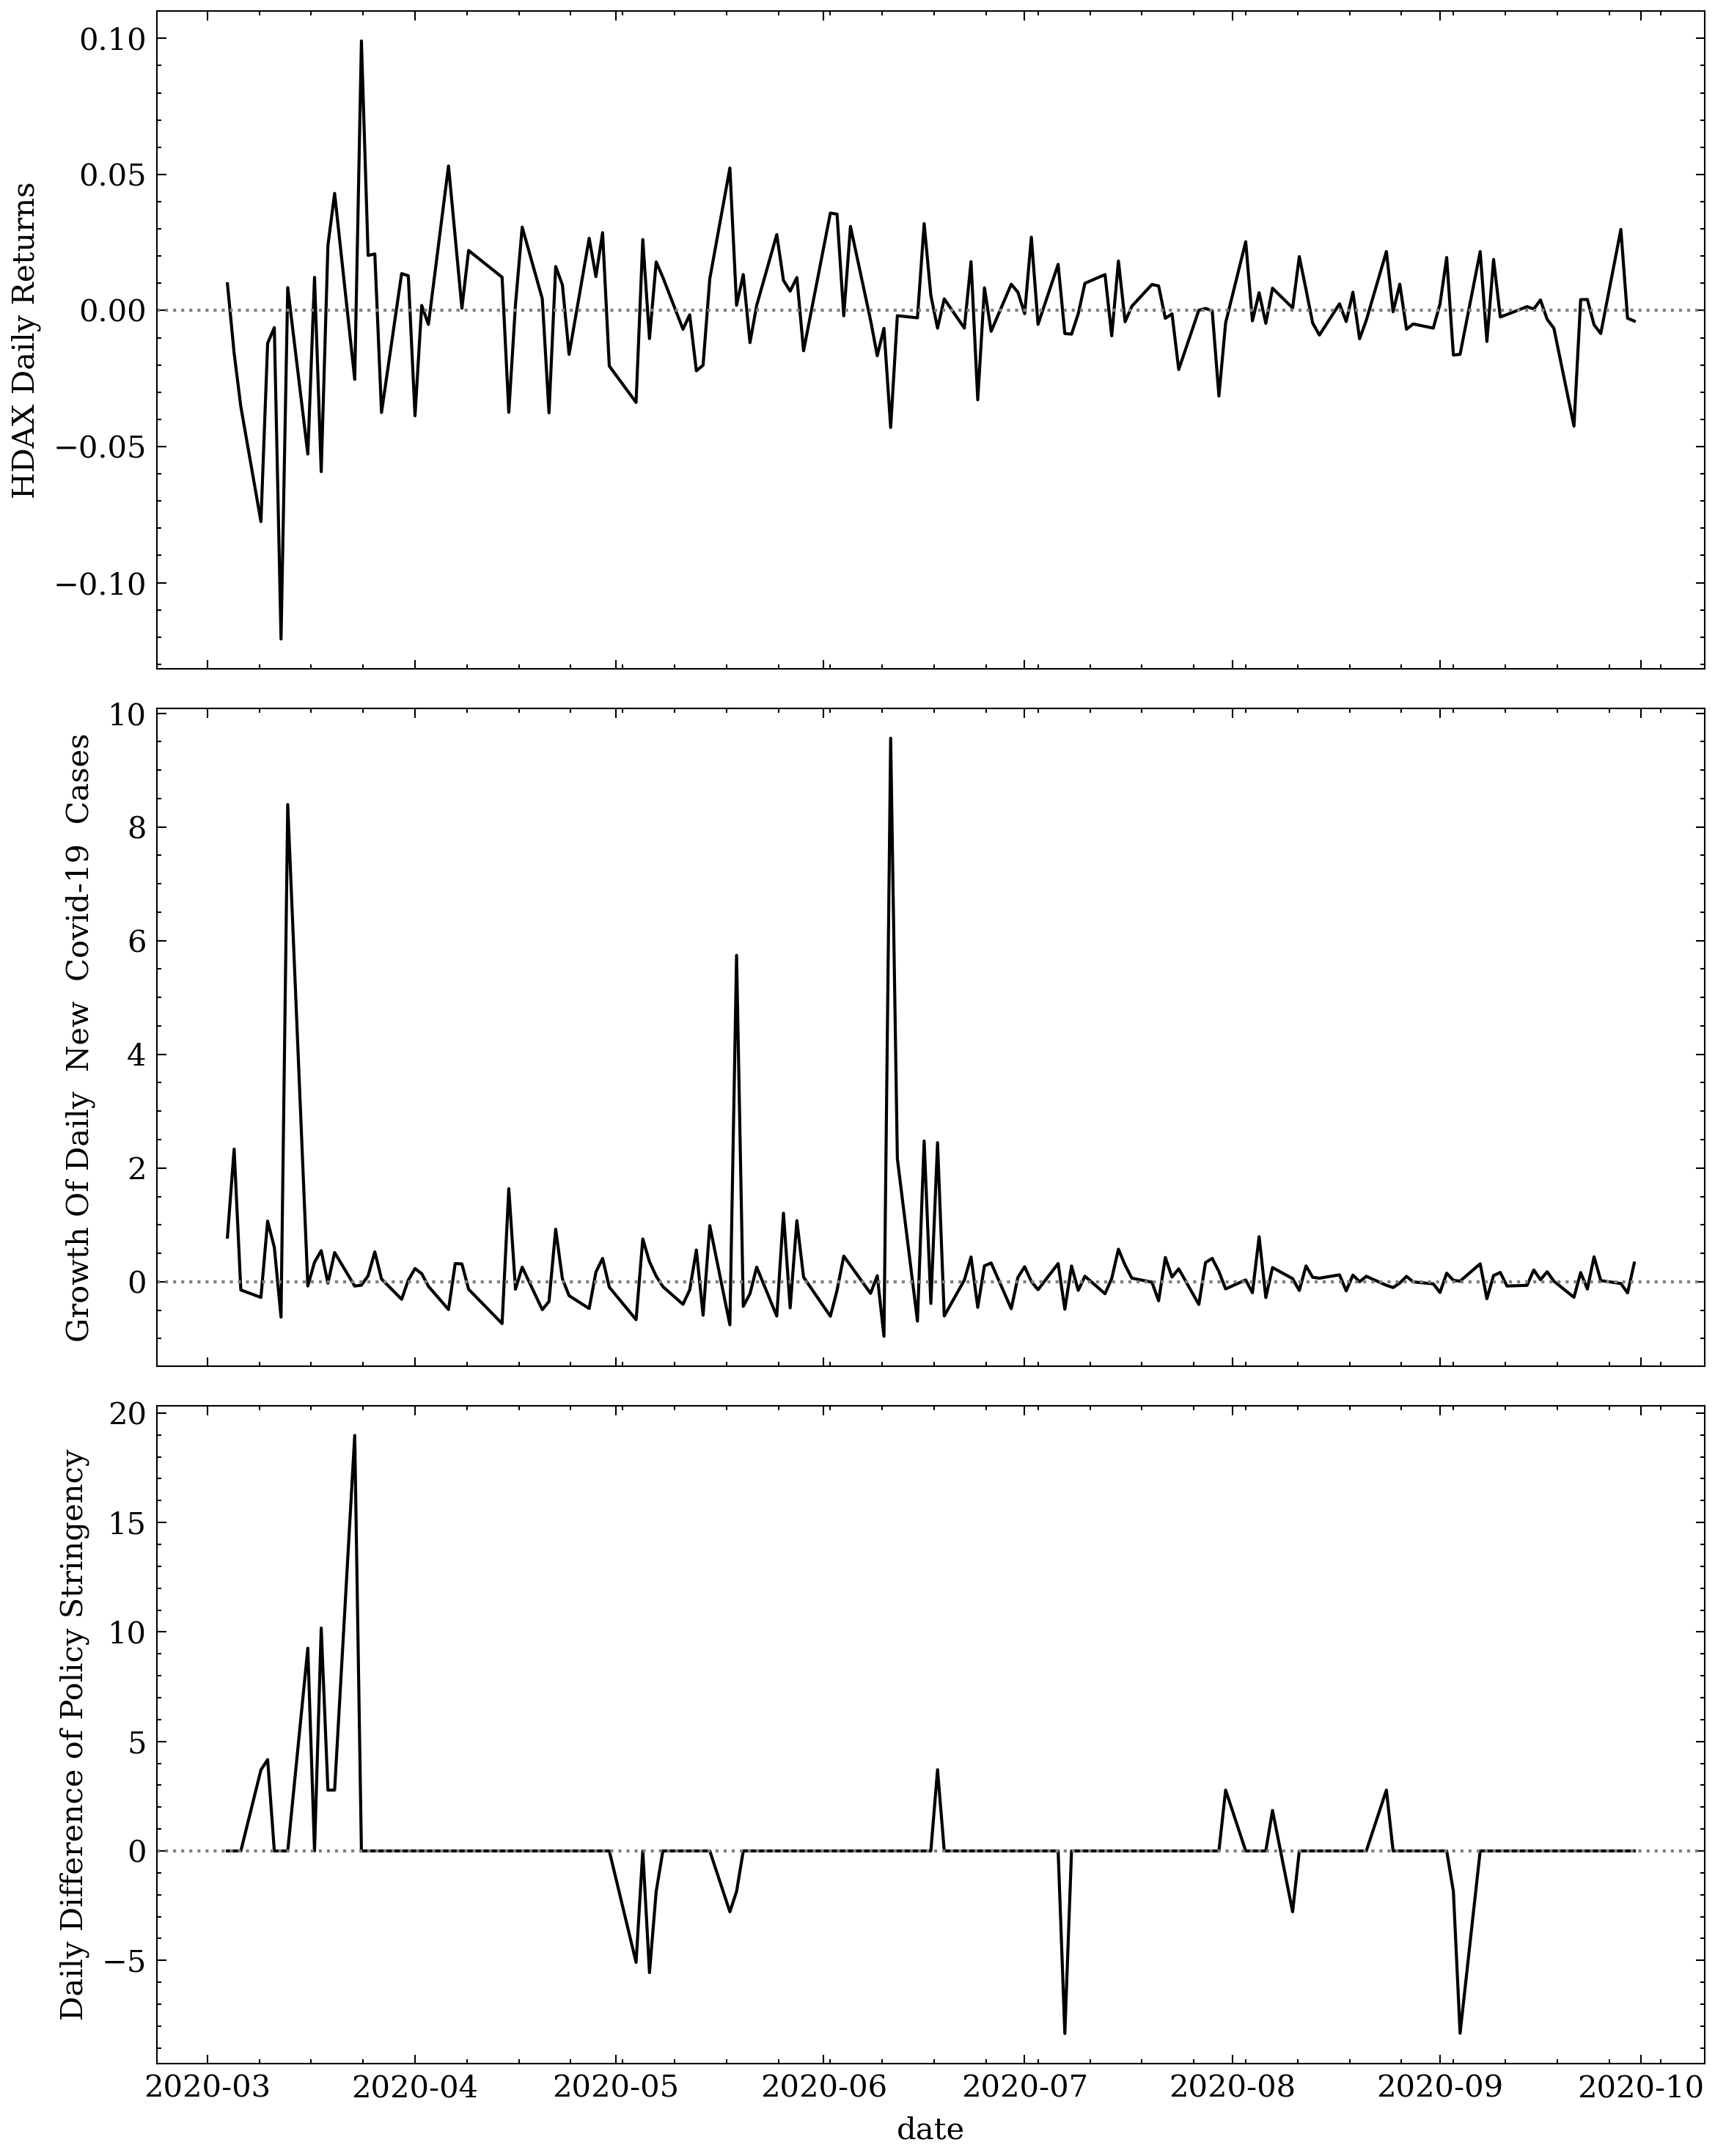

In [16]:
# Plotting first sample timeframe
plt.style.use(['science','no-latex'])
fig, axes = plt.subplots(3,1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

sns.lineplot(data=sample_1, x=sample_1.index, y="hdax_pct", ax=axes[0], color="black", )
axes[0].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_1, x=sample_1.index, y="new_cases_pct", ax=axes[1], color="black")
axes[1].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_1, x=sample_1.index, y="stringency_diff", ax=axes[2], color="black")
axes[2].axhline(y = 0, color = 'gray', ls=":")

axes[0].set_ylabel("HDAX Daily Returns")
axes[0].yaxis.set_label_coords(-0.07,0.5)
axes[1].set_ylabel("Growth of Daily New Covid-19 Cases")
axes[1].yaxis.set_label_coords(-0.07,0.5)
axes[2].set_ylabel("Daily Difference of Policy Stringency")
axes[2].yaxis.set_label_coords(-0.07,0.5);

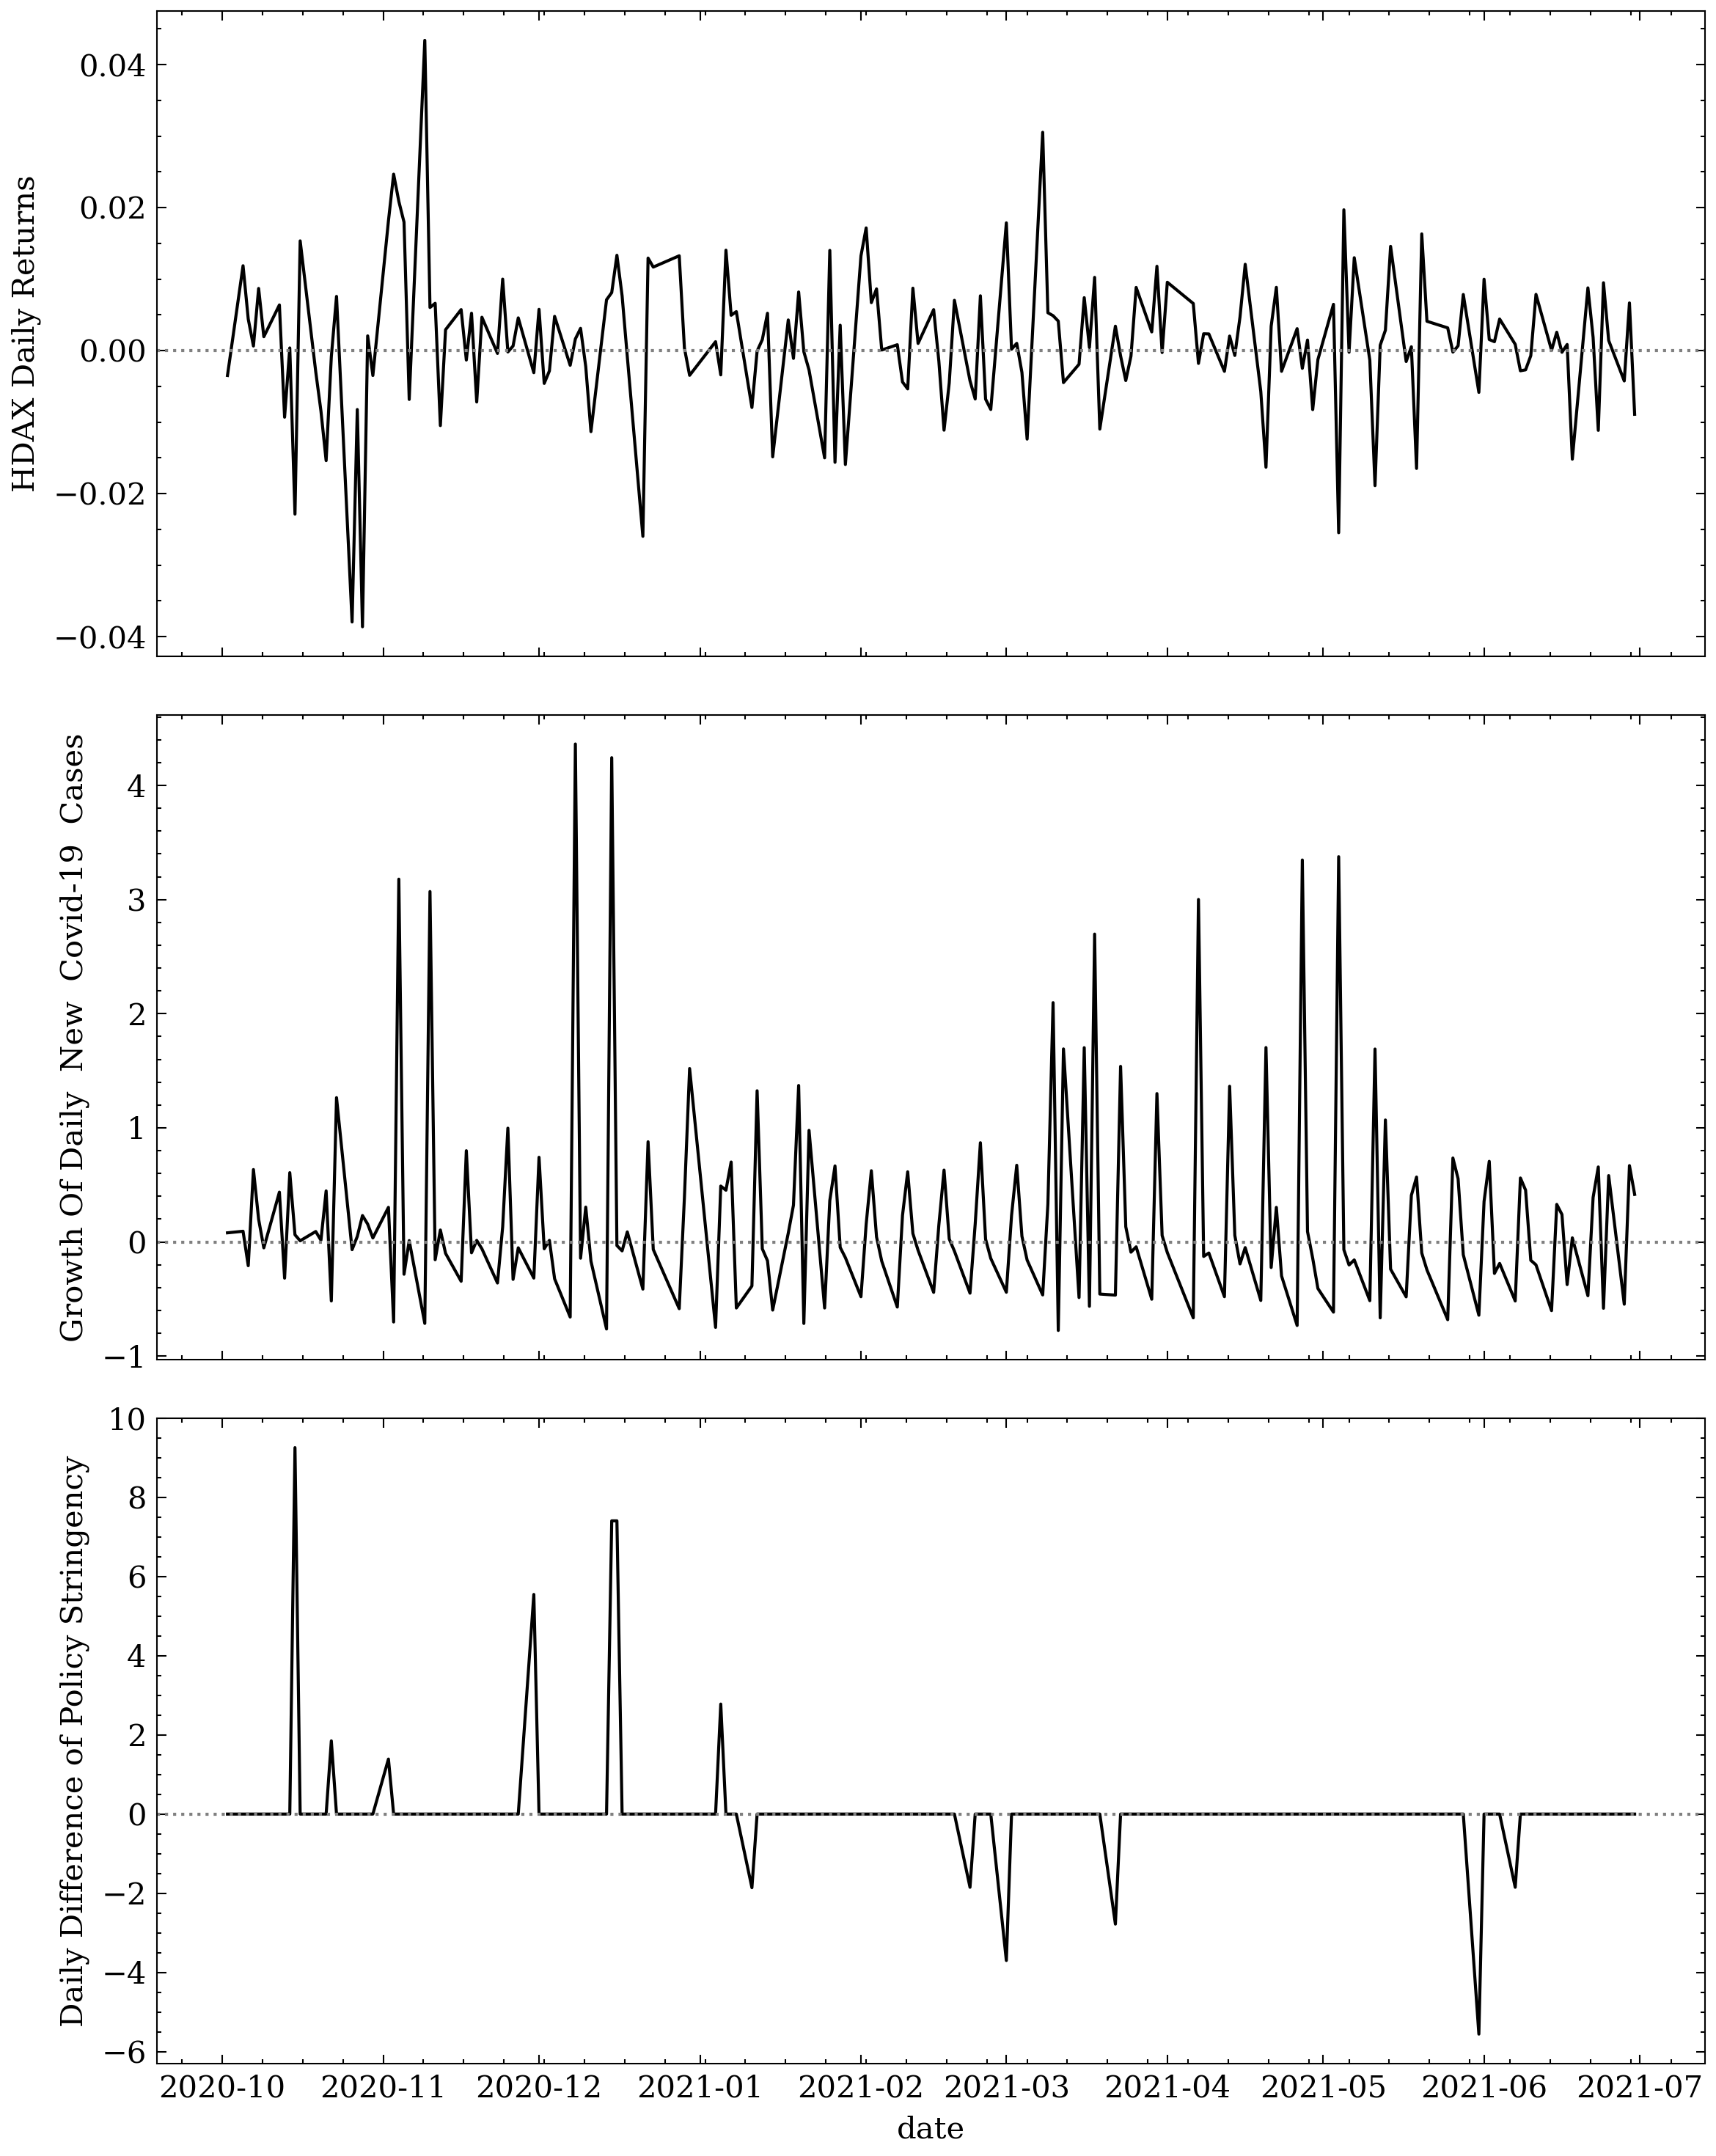

In [17]:
# Plotting second sample timeframe
plt.style.use(['science','no-latex'])
fig, axes = plt.subplots(3,1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

sns.lineplot(data=sample_2, x=sample_2.index, y="hdax_pct", ax=axes[0], color="black")
axes[0].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_2, x=sample_2.index, y="new_cases_pct", ax=axes[1], color="black")
axes[1].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_2, x=sample_2.index, y="stringency_diff", ax=axes[2], color="black")
axes[2].axhline(y = 0, color = 'gray', ls=":")

axes[0].set_ylabel("HDAX Daily Returns")
axes[0].yaxis.set_label_coords(-0.07,0.5)
axes[1].set_ylabel("Growth of Daily New Covid-19 Cases")
axes[1].yaxis.set_label_coords(-0.07,0.5)
axes[2].set_ylabel("Daily Difference of Policy Stringency")
axes[2].yaxis.set_label_coords(-0.07,0.5);

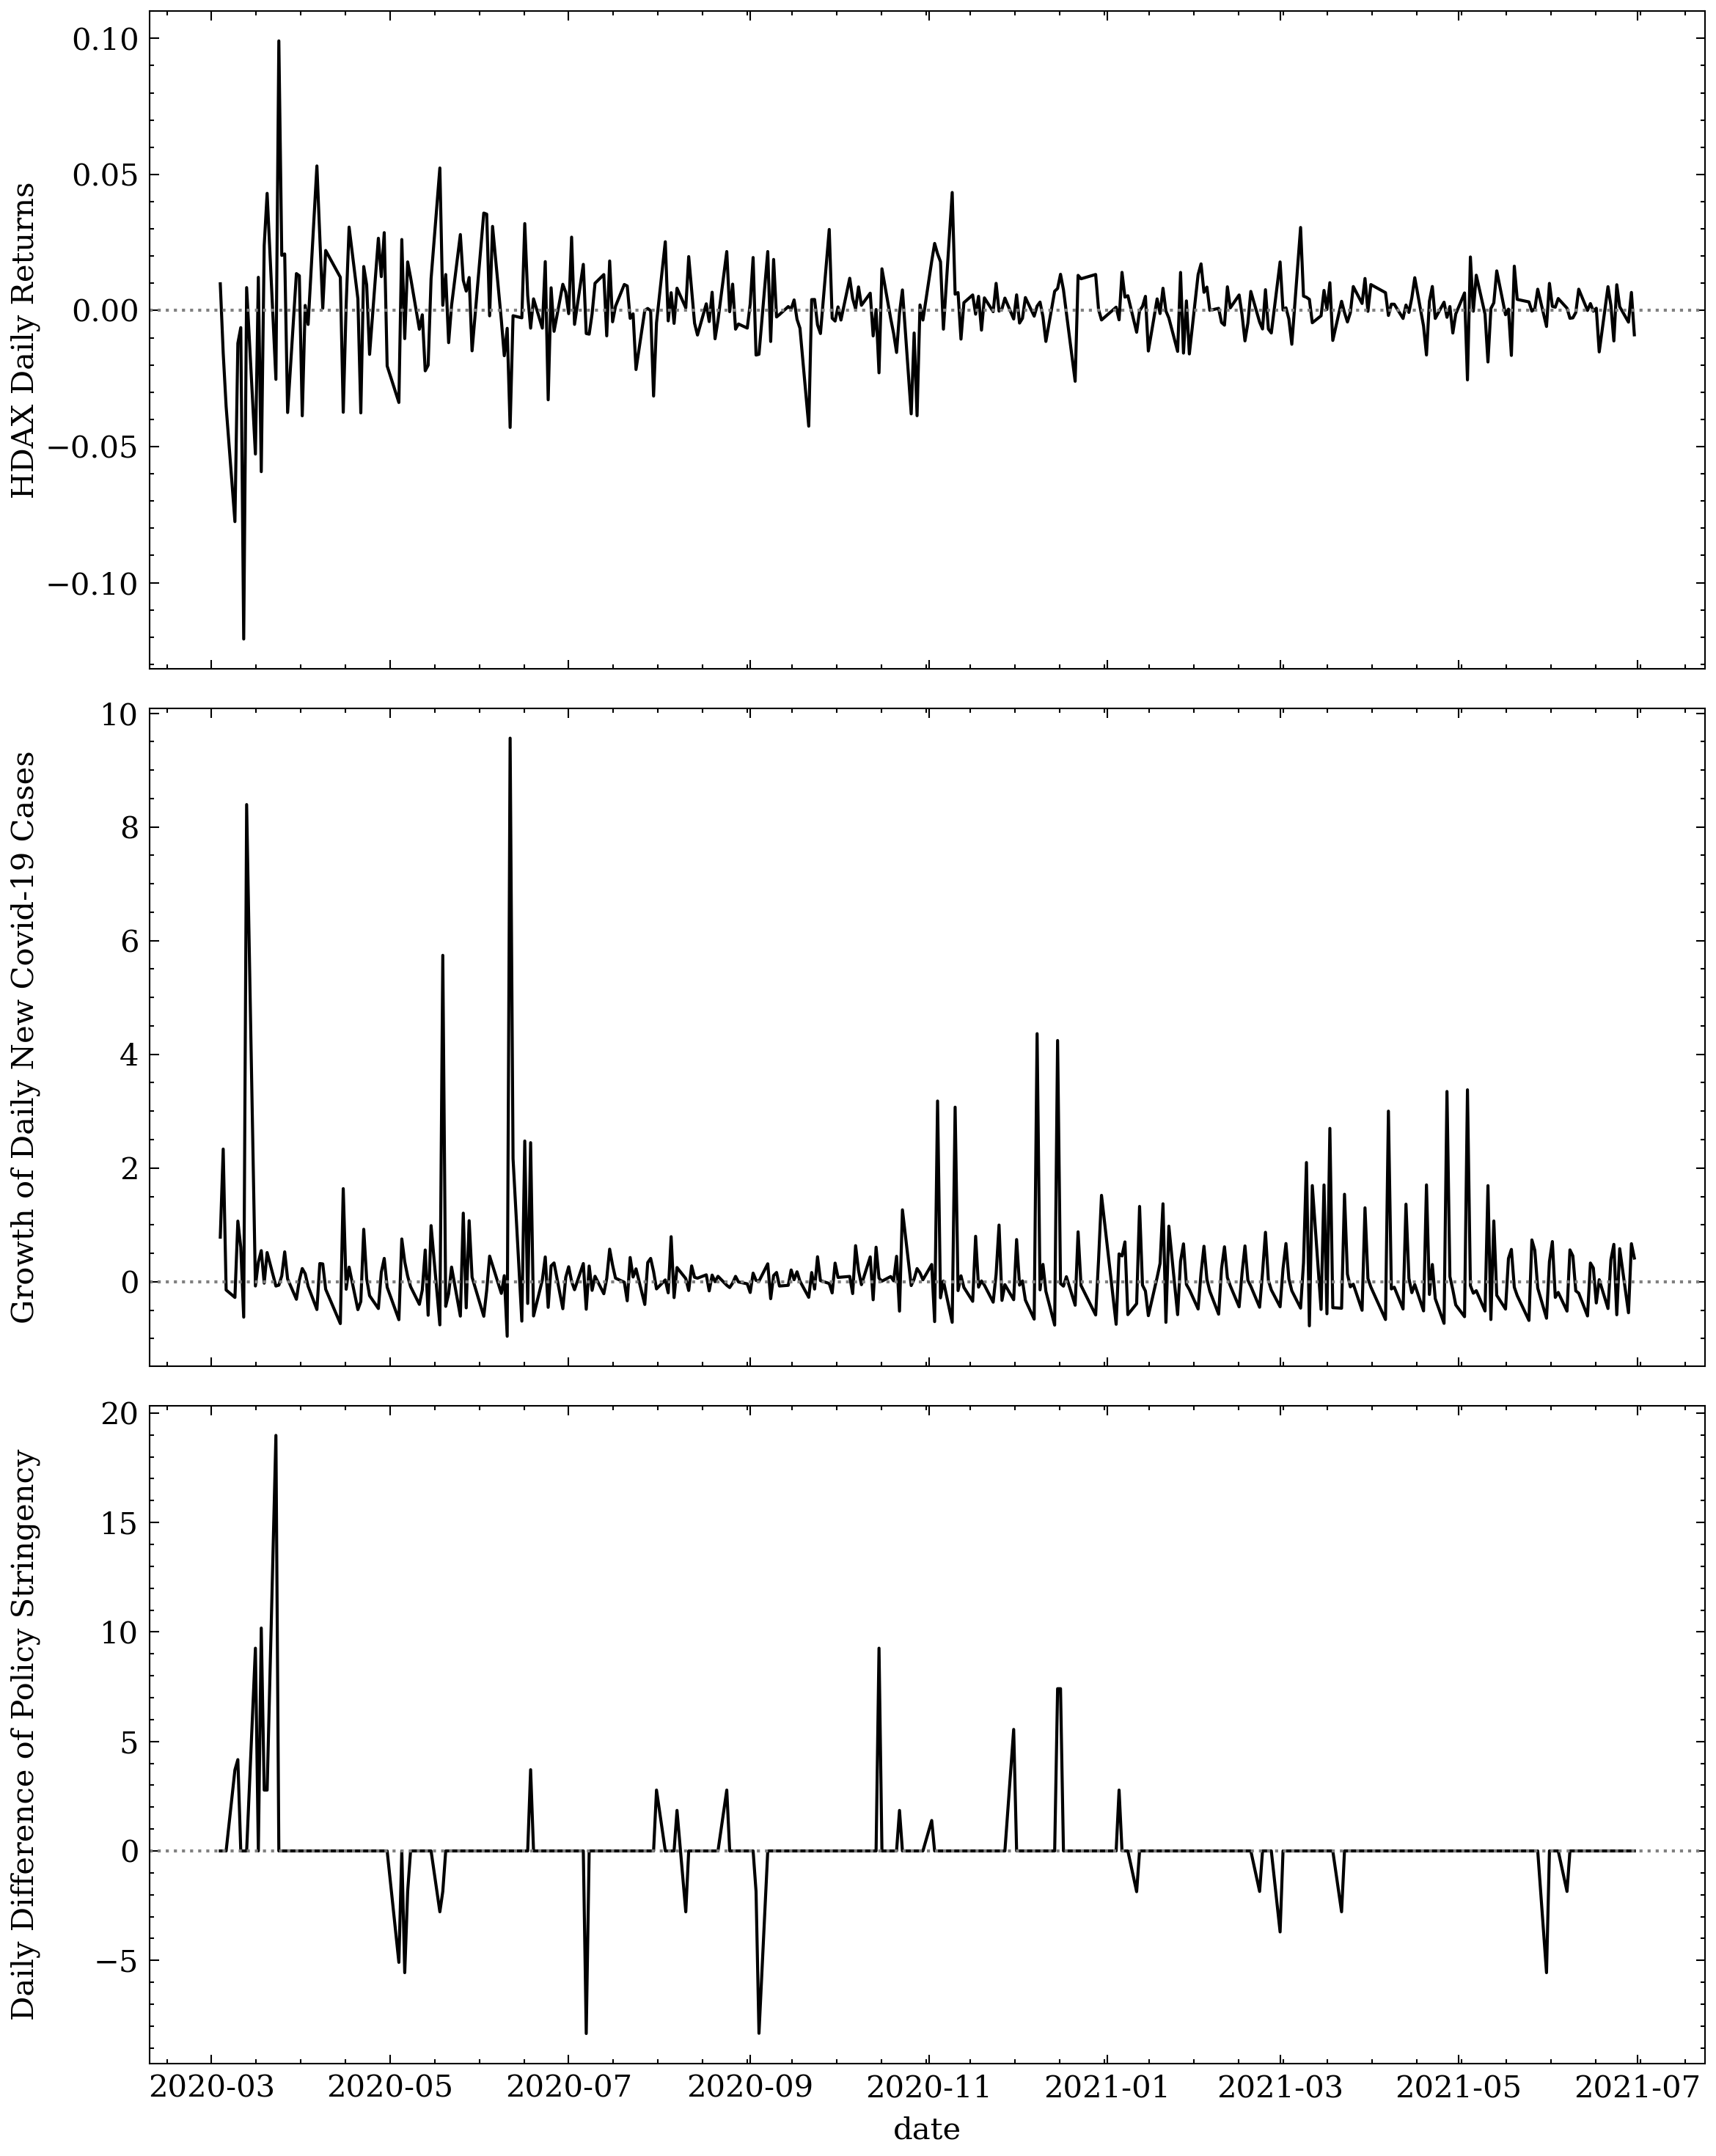

In [23]:
# Plotting full sample timeframe
plt.style.use(['science','no-latex'])
fig, axes = plt.subplots(3,1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

sns.lineplot(data=sample_full, x=sample_full.index, y="hdax_pct", ax=axes[0], color="black")
axes[0].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_full, x=sample_full.index, y="new_cases_pct", ax=axes[1], color="black")
axes[1].axhline(y = 0, color = 'gray', ls=":")
sns.lineplot(data=sample_full, x=sample_full.index, y="stringency_diff", ax=axes[2], color="black")
axes[2].axhline(y = 0, color = 'gray', ls=":")

axes[0].set_ylabel("HDAX Daily Returns")
axes[0].yaxis.set_label_coords(-0.07,0.5)
axes[1].set_ylabel("Growth of Daily New Covid-19 Cases")
axes[1].yaxis.set_label_coords(-0.07,0.5)
axes[2].set_ylabel("Daily Difference of Policy Stringency")
axes[2].yaxis.set_label_coords(-0.07,0.5);
fig.savefig("transformed-charts.pdf")

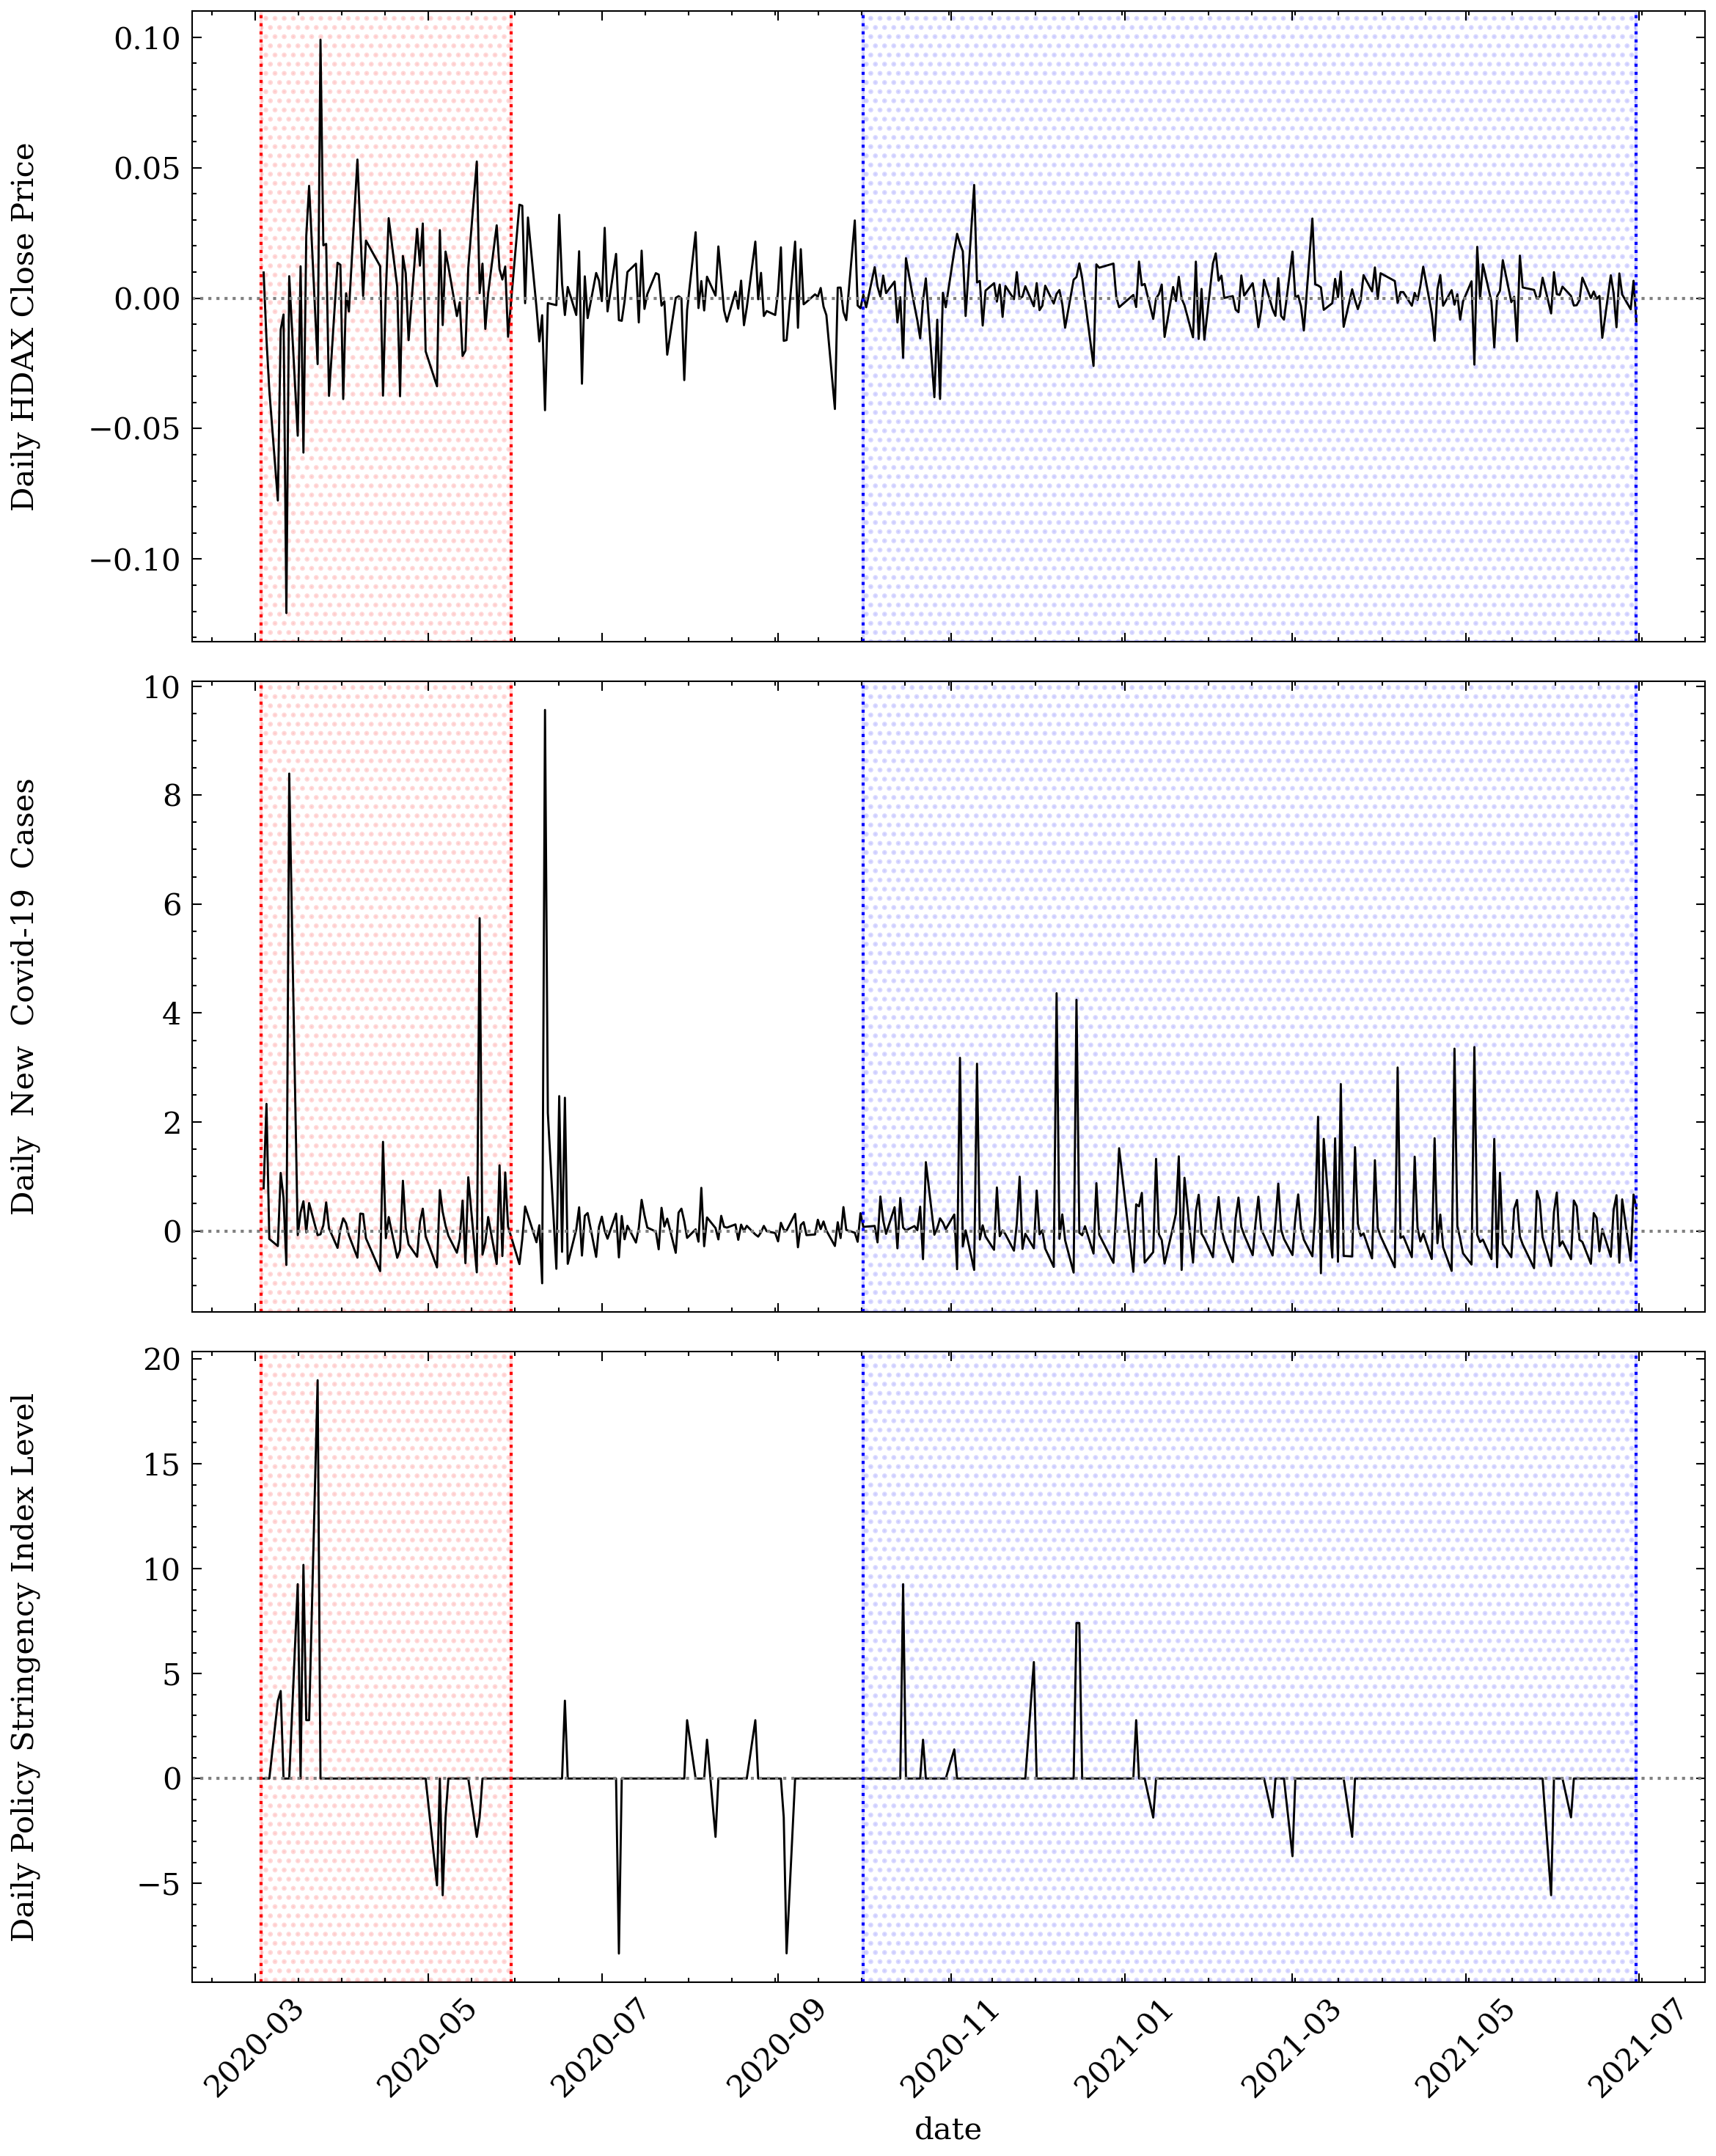

In [45]:
plt.style.use(['science','no-latex'])

#saving sample dates in variables
sample_1_start = pd.to_datetime("2020-03-03")
sample_1_1_end = pd.to_datetime("2020-05-30")
sample_1_end = pd.to_datetime("2020-09-30")
sample_2_start = pd.to_datetime("2020-10-01")
sample_2_end = pd.to_datetime("2021-06-30")

columns = list(sample_full.columns)

#plotting the different datapoints and highlighting the two sample areas

fig, axes = plt.subplots(3, 1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

#plotting and highlighting samples
for column, ax in zip(columns, axes.reshape(-1)):
    sns.lineplot(x=sample_full.index, y=column, data=sample_full, ax=ax, color="black", linewidth= 0.7)
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.axhline(y = 0, color = 'gray', ls=":")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    # highlight the first wave sample
    ax.axvline(x = sample_1_start, color = 'red', ls=":")
    ax.axvline(x = sample_1_1_end, color = 'red', ls=":")
    ax.axvspan(sample_1_start, sample_1_1_end, alpha=0.15, color='red', hatch="....", fill=False)
    
    # highlight the second wave sample
    ax.axvline(x = sample_2_start, color = 'blue', ls=":")
    ax.axvline(x = sample_2_end, color = 'blue', ls=":")
    ax.axvspan(sample_2_start, sample_2_end, alpha=0.15, color='blue', hatch="....", fill=False)

axes[0].set_ylabel("Daily HDAX Close Price")
axes[1].set_ylabel("Daily  New  Covid-19  Cases")
axes[2].set_ylabel("Daily Policy Stringency Index Level");
fig.savefig('all_charts_marked_transformed.pdf', format='pdf')